### Following the Word Embedding from scratch tutorial from StatQuest

In [ ]:
!pip install lightning

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.distributions.uniform import Uniform
from torch.utils.data import TensorDataset, DataLoader

import lightning as L

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
inputs = torch.tensor([[1., 0., 0., 0.],
                      [0., 1., 0., 0.],
                      [0., 0., 1., 0.],
                      [0., 0., 0., 1.]])

labels = torch.tensor([[0., 1., 0., 0.],
                      [0., 0., 1., 0.],
                      [0., 0., 0., 1.],
                      [0., 1., 0., 0.]])

In [ ]:
dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

In [ ]:
class WordEmbedding(L.LightningModule):
  def __init__(self):
  # Create and initialize Weight tensors, and create the loss function
    super().__init__()

    min_value = -0.5
    max_value = 0.5

    self.input1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.input1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.input2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.input2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.input3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.input3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.input4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.input4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

    self.output1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.output1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.output2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.output2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.output3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.output3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.output4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.output4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

    self.loss = nn.CrossEntropyLoss()

  def forward(self, input):
  # Make a forward pass through the network
    input = input[0]

    inputs_to_top_hidden = ((input[0] * self.input1_w1) +
                            (input[1] * self.input2_w1) +
                            (input[2] * self.input3_w1) +
                            (input[3] * self.input4_w1))

    inputs_to_bottom_hidden = ((input[0] * self.input1_w2) +
                               (input[1] * self.input2_w2) +
                               (input[2] * self.input3_w2) +
                               (input[3] * self.input4_w2))

    output1 = ((inputs_to_top_hidden * self.output1_w1) +
               (inputs_to_bottom_hidden * self.output1_w2))

    output2 = ((inputs_to_top_hidden * self.output2_w1) +
               (inputs_to_bottom_hidden * self.output2_w2))

    output3 = ((inputs_to_top_hidden * self.output3_w1) +
               (inputs_to_bottom_hidden * self.output3_w2))

    output4 = ((inputs_to_top_hidden * self.output4_w1) +
               (inputs_to_bottom_hidden * self.output4_w2))

    output_pre_softmax = torch.stack([output1, output2, output3, output4])

    return output_pre_softmax

  def configure_optimizers(self):
  # Configure Adam optimizer
    return Adam(self.parameters(), lr=0.1)

  def training_step(self, batch, batch_idx):
  # Calculate loss
    input_i, label_i = batch
    output_i = self.forward(input_i)
    loss = self.loss(output_i, label_i[0])

    return loss

In [ ]:
model = WordEmbedding()

print("Before optimization the parameters are..")
for name, params in model.named_parameters():
  print(name, params.data)

Before optimization the parameters are..
input1_w1 tensor(-0.2827)
input1_w2 tensor(-0.3648)
input2_w1 tensor(-0.2417)
input2_w2 tensor(-0.0003)
input3_w1 tensor(-0.1280)
input3_w2 tensor(-0.1960)
input4_w1 tensor(-0.2258)
input4_w2 tensor(0.0380)
output1_w1 tensor(0.2760)
output1_w2 tensor(0.1596)
output2_w1 tensor(0.1779)
output2_w2 tensor(-0.2593)
output3_w1 tensor(-0.4326)
output3_w2 tensor(0.4100)
output4_w1 tensor(0.1453)
output4_w2 tensor(0.0562)


In [ ]:
data = {
    "w1": [model.input1_w1.item(),
           model.input2_w1.item(),
           model.input3_w1.item(),
           model.input4_w1.item()],
    "w2": [model.input1_w2.item(),
           model.input2_w2.item(),
           model.input3_w2.item(),
           model.input4_w2.item()],
    "token": ['Varun', 'is', 'awesome', 'Dixit'],
    "input": ['Input1', "Input2", "Input3", "Input4"]
}
df = pd.DataFrame(data)
print(df)

         w1        w2    token   input
0 -0.282734 -0.364800    Varun  Input1
1 -0.241675 -0.000279       is  Input2
2 -0.128012 -0.196035  awesome  Input3
3 -0.225825  0.037956    Dixit  Input4


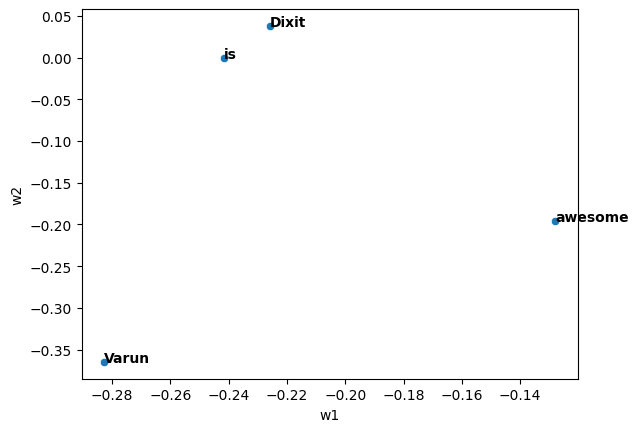

In [ ]:
sns.scatterplot(data=df, x='w1', y='w2')
plt.text(df.w1[0], df.w2[0], df.token[0], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[1], df.w2[1], df.token[1], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[2], df.w2[2], df.token[2], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[3], df.w2[3], df.token[3], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

In [ ]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(model, train_dataloaders=dataloader)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | loss         | CrossEntropyLoss | 0      | train
  | other params | n/a              | 16     | n/a  
----------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode
INFO:lightnin

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


In [ ]:
data = {
    "w1": [model.input1_w1.item(),
           model.input2_w1.item(),
           model.input3_w1.item(),
           model.input4_w1.item()],
    "w2": [model.input1_w2.item(),
           model.input2_w2.item(),
           model.input3_w2.item(),
           model.input4_w2.item()],
    "token": ['Varun', 'is', 'awesome', 'Dixit'],
    "input": ['Input1', "Input2", "Input3", "Input4"]
}
df = pd.DataFrame(data)
print(df)

         w1        w2    token   input
0 -1.252827 -1.920812    Varun  Input1
1 -2.005298  1.849890       is  Input2
2  2.405137 -1.470854  awesome  Input3
3 -1.748360 -1.504894    Dixit  Input4


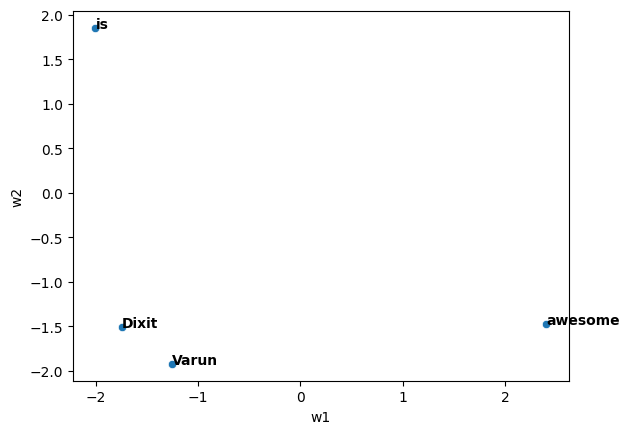

In [ ]:
sns.scatterplot(data=df, x='w1', y='w2')
plt.text(df.w1[0], df.w2[0], df.token[0], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[1], df.w2[1], df.token[1], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[2], df.w2[2], df.token[2], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[3], df.w2[3], df.token[3], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

In [ ]:
softmax = nn.Softmax(dim=0)
print(torch.round(softmax(model(torch.tensor([[1., 0., 0., 0.]]))), decimals=2))
print(torch.round(softmax(model(torch.tensor([[0., 1., 0., 0.]]))), decimals=2))
print(torch.round(softmax(model(torch.tensor([[0., 0., 1., 0.]]))), decimals=2))
print(torch.round(softmax(model(torch.tensor([[1., 0., 0., 1.]]))), decimals=2))

tensor([0., 1., 0., 0.], grad_fn=<RoundBackward1>)
tensor([0., 0., 1., 0.], grad_fn=<RoundBackward1>)
tensor([0., 0., 0., 1.], grad_fn=<RoundBackward1>)
tensor([0., 1., 0., 0.], grad_fn=<RoundBackward1>)


### Using the nn.linear() function from PyTorch

In [ ]:
class WordEmbeddingWithLinear(L.LightningModule):
  def __init__(self):
    super().__init__()
    self.input_to_hidden = nn.Linear(in_features=4, out_features=2, bias=False)
    self.hidden_to_output = nn.Linear(in_features=2, out_features=4, bias=False)
    self.loss = nn.CrossEntropyLoss()

  def forward(self, input):
      hidden = self.input_to_hidden(input)
      output = self.hidden_to_output(hidden)
      return output

  def configure_optimizers(self):
      return Adam(self.parameters(), lr=0.1)

  def training_step(self, batch, batch_idx):
      input_i, label_i = batch
      output_i = self.forward(input_i)
      loss = self.loss(output_i, label_i)
      return loss

In [ ]:
modellinear = WordEmbeddingWithLinear()

In [ ]:
data = {
    "w1": modellinear.input_to_hidden.weight.detach()[0].numpy(),
    "w2": modellinear.input_to_hidden.weight.detach()[1].numpy(),
    "token": ['Varun', 'is', 'awesome', 'Dixit'],
    "input": ['Input1', "Input2", "Input3", "Input4"]
}
df = pd.DataFrame(data)
print(df)

         w1        w2    token   input
0 -0.218310  0.402604    Varun  Input1
1 -0.146373 -0.327709       is  Input2
2  0.012686 -0.065361  awesome  Input3
3 -0.030376  0.326553    Dixit  Input4


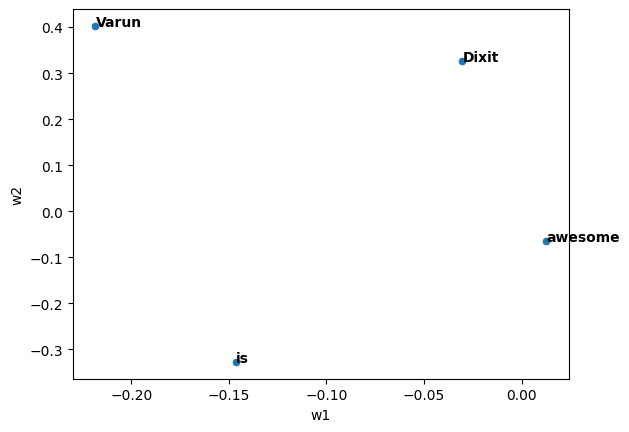

In [ ]:
sns.scatterplot(data=df, x='w1', y='w2')
plt.text(df.w1[0], df.w2[0], df.token[0], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[1], df.w2[1], df.token[1], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[2], df.w2[2], df.token[2], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[3], df.w2[3], df.token[3], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

In [ ]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(modellinear, train_dataloaders=dataloader)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name             | Type             | Params | Mode 
--------------------------------------------------------------
0 | input_to_hidden  | Linear           | 8      | train
1 | hidden_to_output | Linear           | 8      | train
2 | loss             | CrossEntropyLoss | 0      | train
--------------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


In [ ]:
data = {
    "w1": modellinear.input_to_hidden.weight.detach()[0].numpy(),
    "w2": modellinear.input_to_hidden.weight.detach()[1].numpy(),
    "token": ['Varun', 'is', 'awesome', 'Dixit'],
    "input": ['Input1', "Input2", "Input3", "Input4"]
}
df = pd.DataFrame(data)
print(df)

         w1        w2    token   input
0 -0.650080  2.432020    Varun  Input1
1 -1.998891 -1.920293       is  Input2
2  2.541150 -0.022522  awesome  Input3
3 -1.168471  2.147568    Dixit  Input4


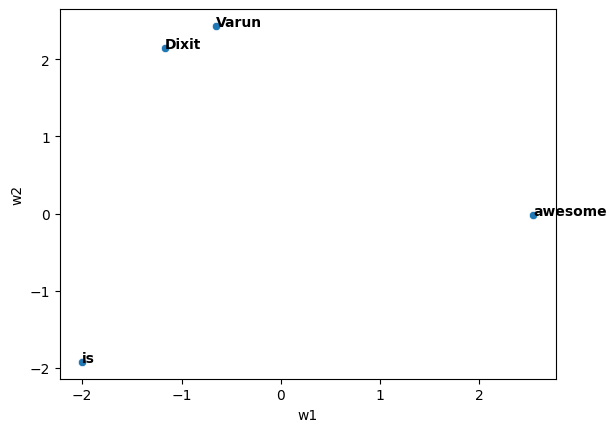

In [ ]:
sns.scatterplot(data=df, x='w1', y='w2')
plt.text(df.w1[0], df.w2[0], df.token[0], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[1], df.w2[1], df.token[1], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[2], df.w2[2], df.token[2], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[3], df.w2[3], df.token[3], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()